In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Data Preprocessing

In [10]:
data = pd.read_csv('data.csv')

In [11]:
data

,Date,Temp (R),Humid (R),PM2.5 (R),Temp,PM2.5
0,2024-01-31 23:00:00,25.5,85.8,26.0,25.5,21.6
1,2024-01-31 22:59:00,25.5,85.9,26.0,25.5,21.6
2,2024-01-31 22:58:00,25.5,85.7,25.0,25.5,21.5
3,2024-01-31 22:57:00,25.6,85.3,24.0,25.5,21.5
4,2024-01-31 22:56:00,25.6,85.2,25.0,25.5,21.5
...,...,...,...,...,...,...
44156,2024-01-01 07:04:00,21.3,92.9,10.0,21.3,10.9
44157,2024-01-01 07:03:00,21.3,92.9,10.0,21.3,10.9
44158,2024-01-01 07:02:00,21.3,92.9,10.0,21.3,10.9
44159,2024-01-01 07:01:00,21.3,92.9,10.0,21.3,10.9


In [12]:
data[['date', 'time']] = data['Date'].str.split(' ', expand=True)

In [13]:
data.drop('Date', axis=1, inplace=True)

In [14]:
data

,Temp (R),Humid (R),PM2.5 (R),Temp,PM2.5,date,time
0,25.5,85.8,26.0,25.5,21.6,2024-01-31,23:00:00
1,25.5,85.9,26.0,25.5,21.6,2024-01-31,22:59:00
2,25.5,85.7,25.0,25.5,21.5,2024-01-31,22:58:00
3,25.6,85.3,24.0,25.5,21.5,2024-01-31,22:57:00
4,25.6,85.2,25.0,25.5,21.5,2024-01-31,22:56:00
...,...,...,...,...,...,...,...
44156,21.3,92.9,10.0,21.3,10.9,2024-01-01,07:04:00
44157,21.3,92.9,10.0,21.3,10.9,2024-01-01,07:03:00
44158,21.3,92.9,10.0,21.3,10.9,2024-01-01,07:02:00
44159,21.3,92.9,10.0,21.3,10.9,2024-01-01,07:01:00


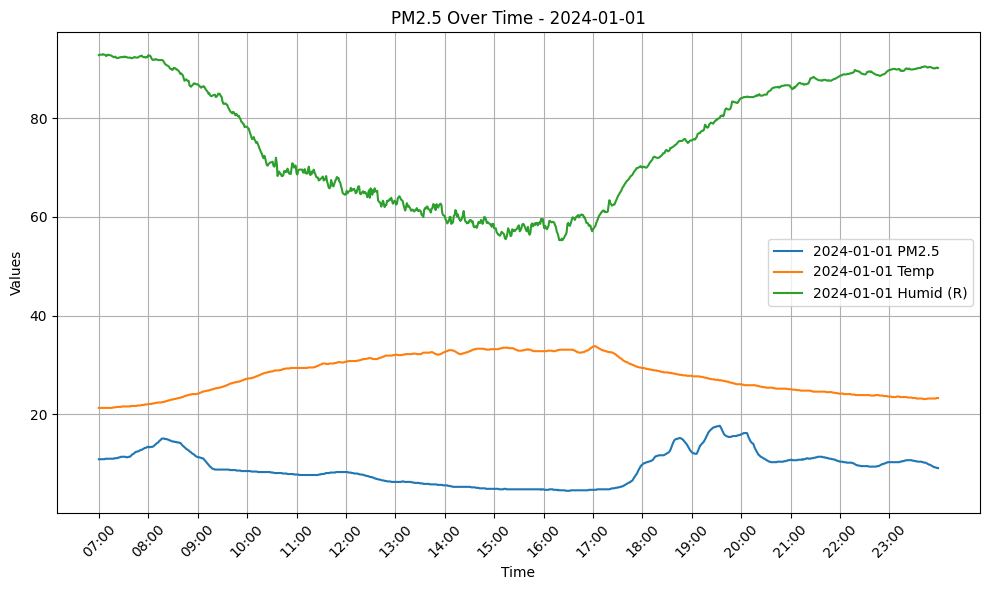

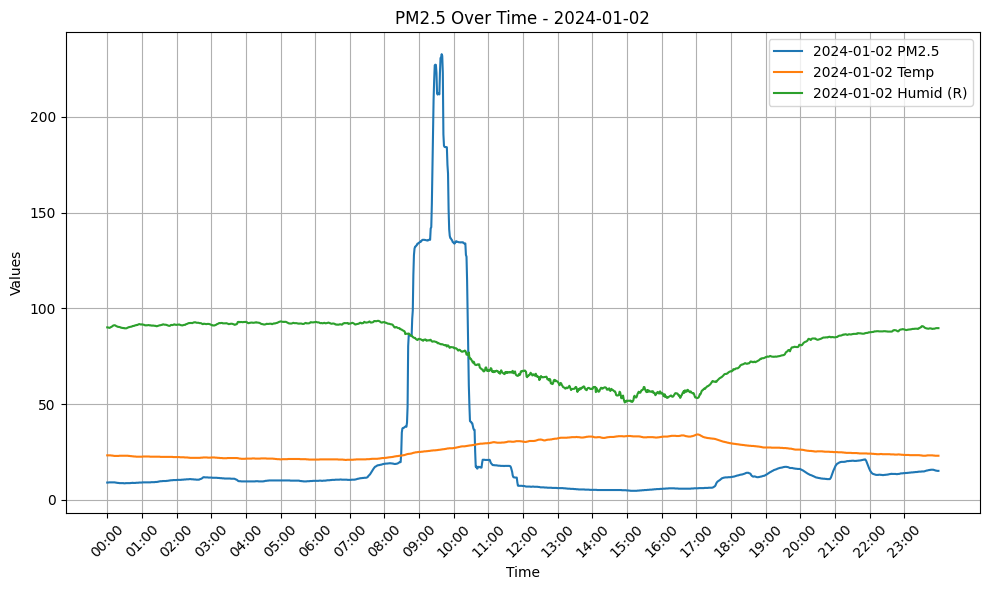

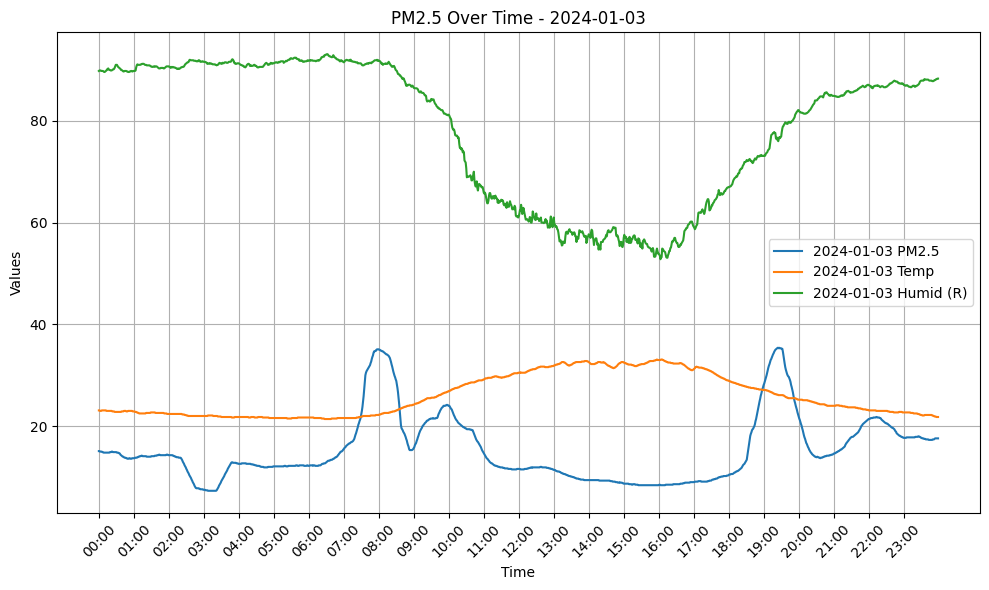

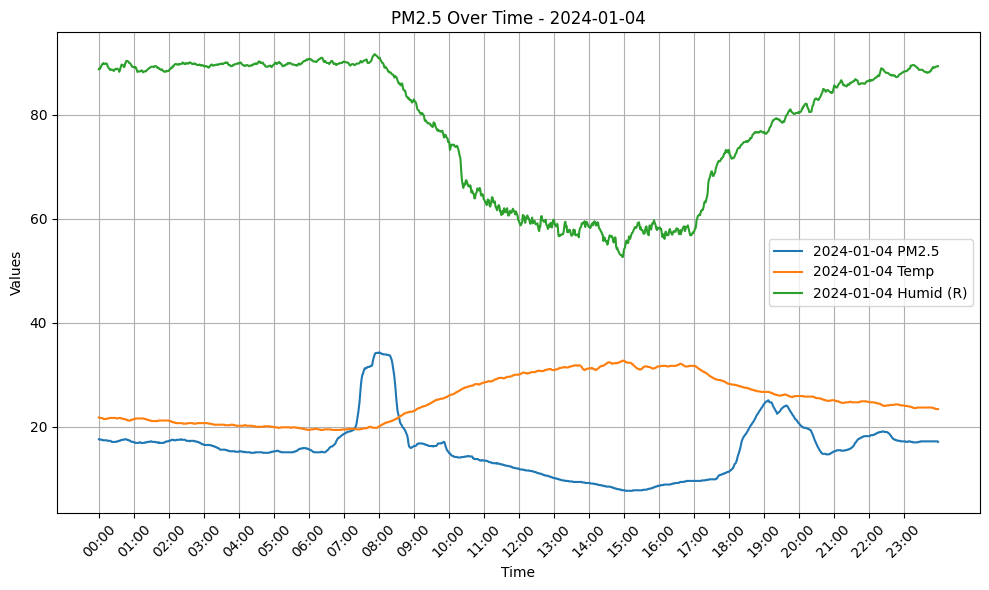

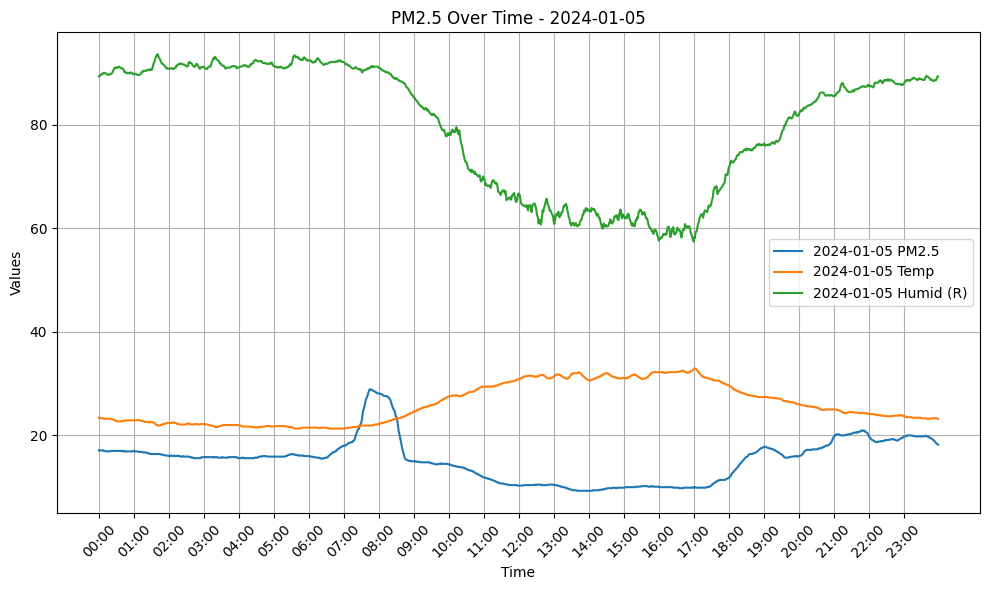

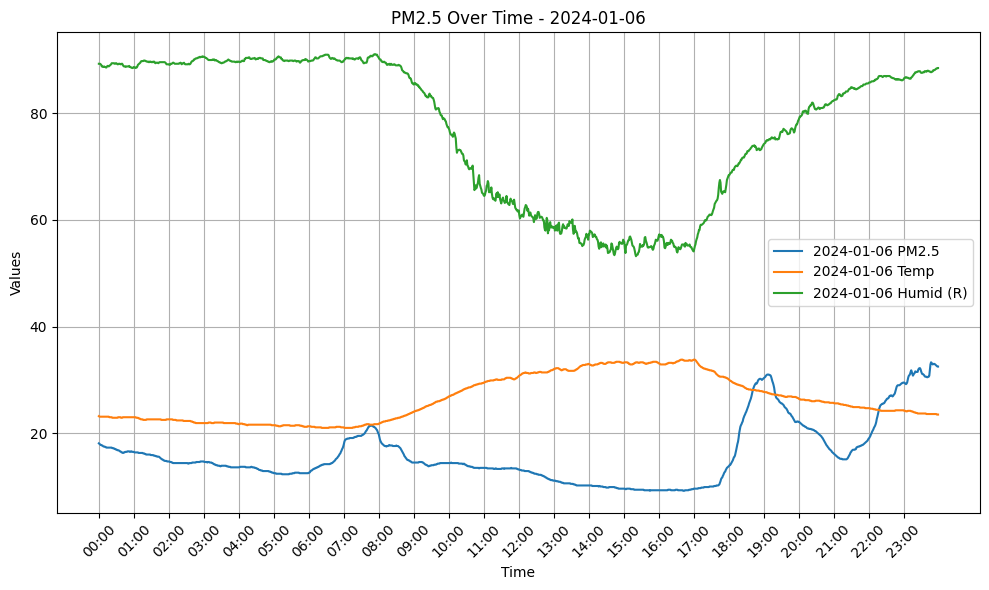

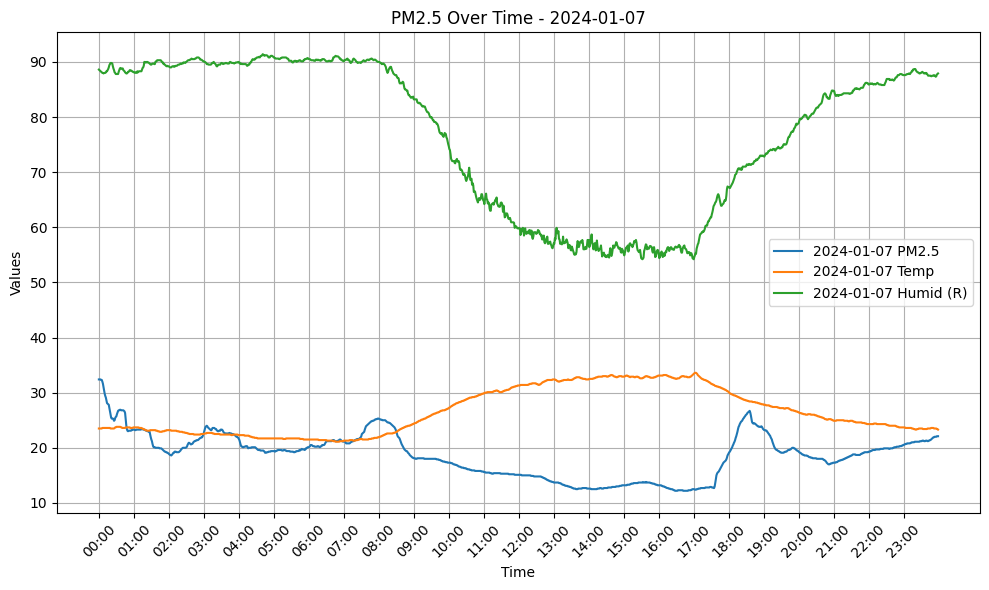

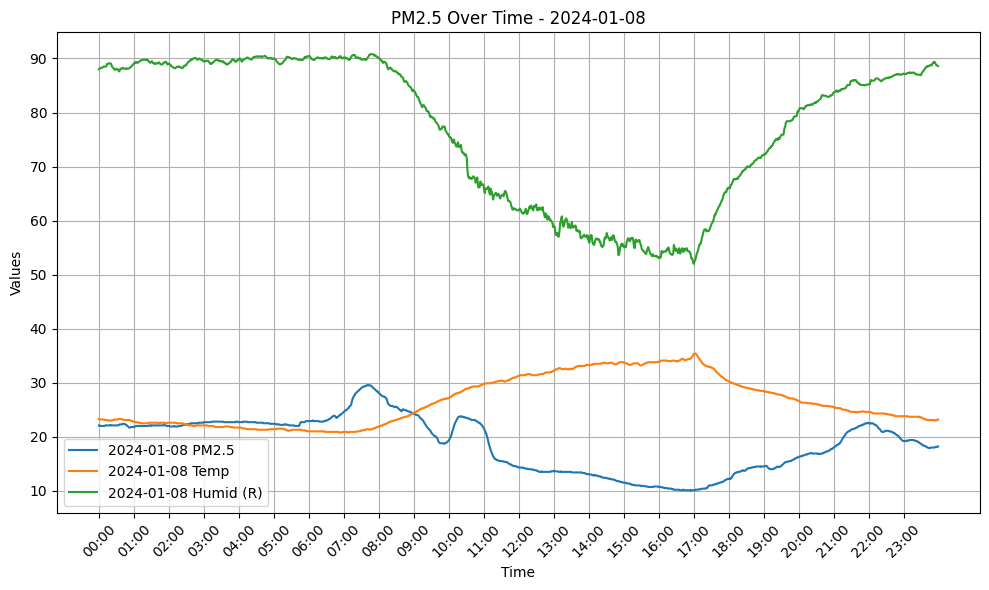

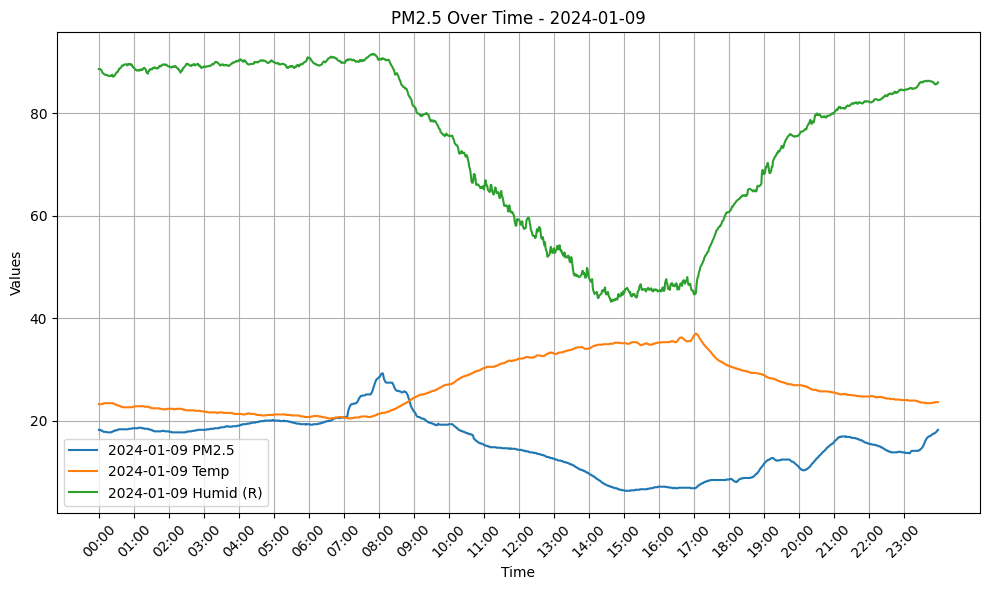

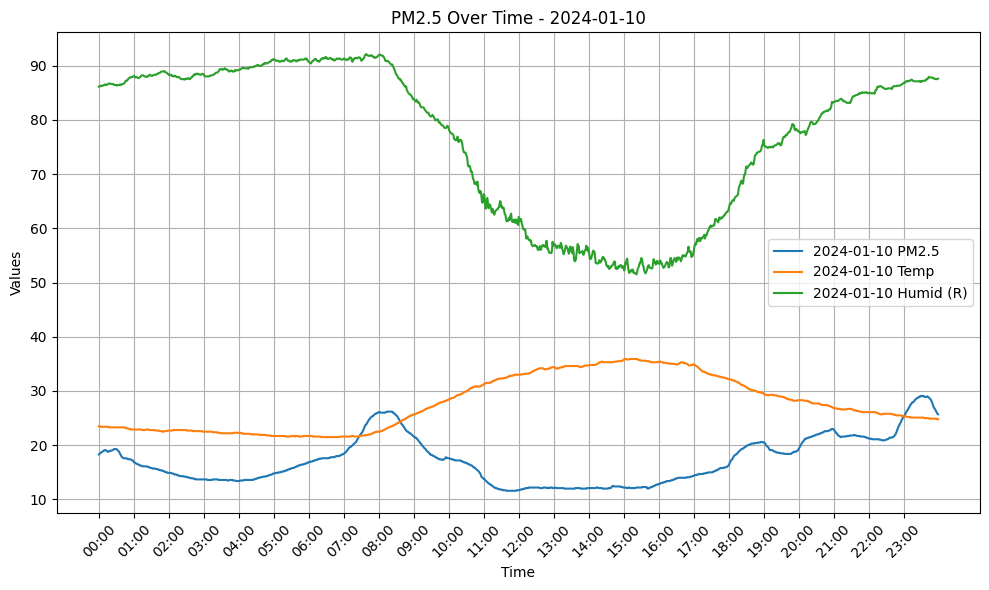

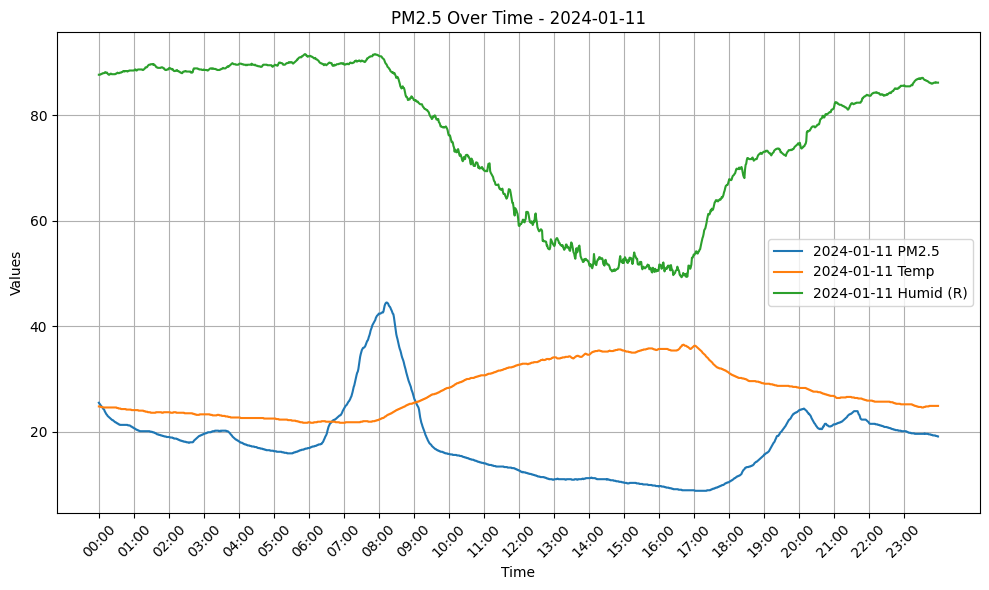

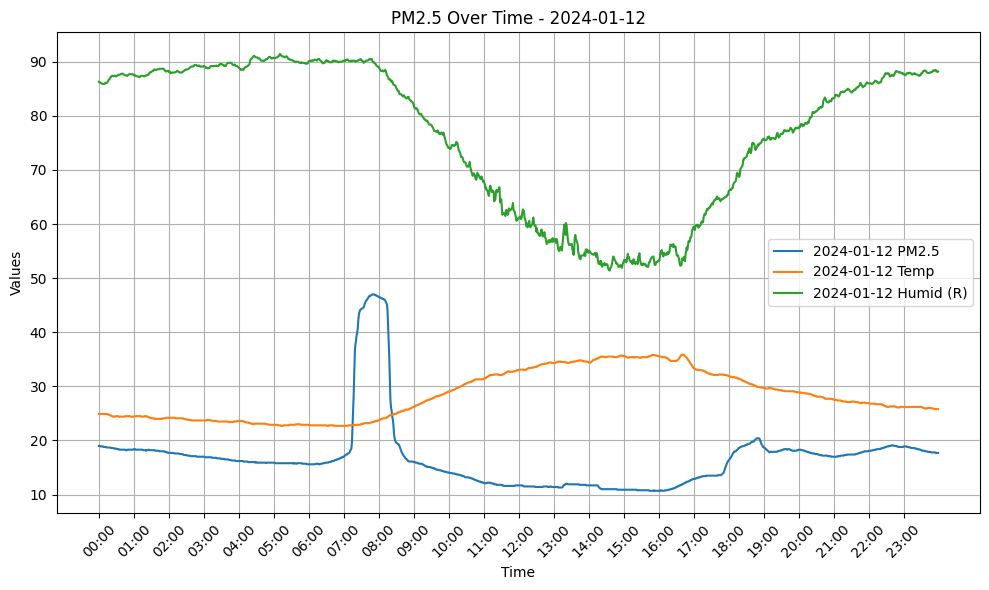

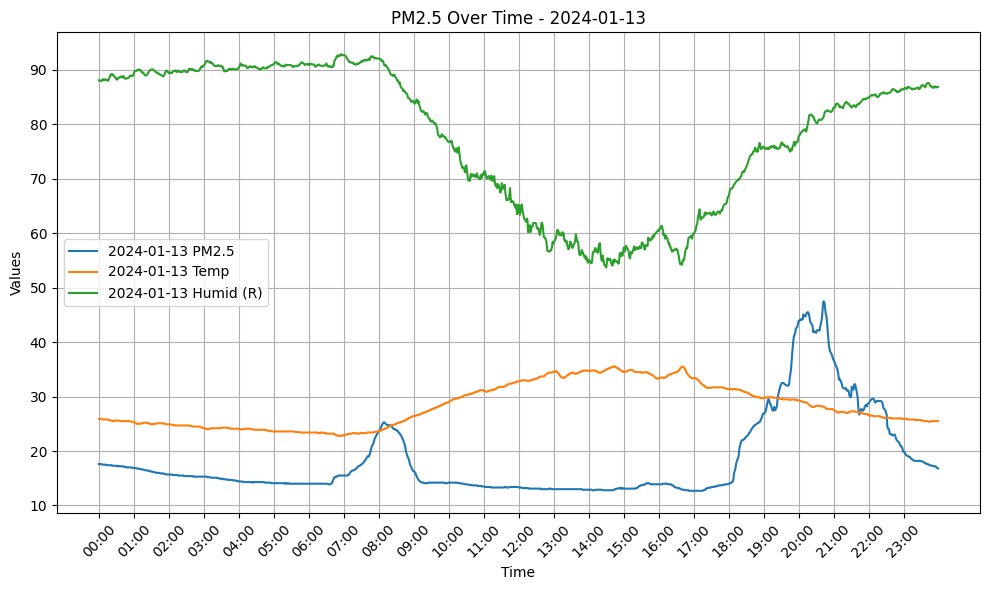

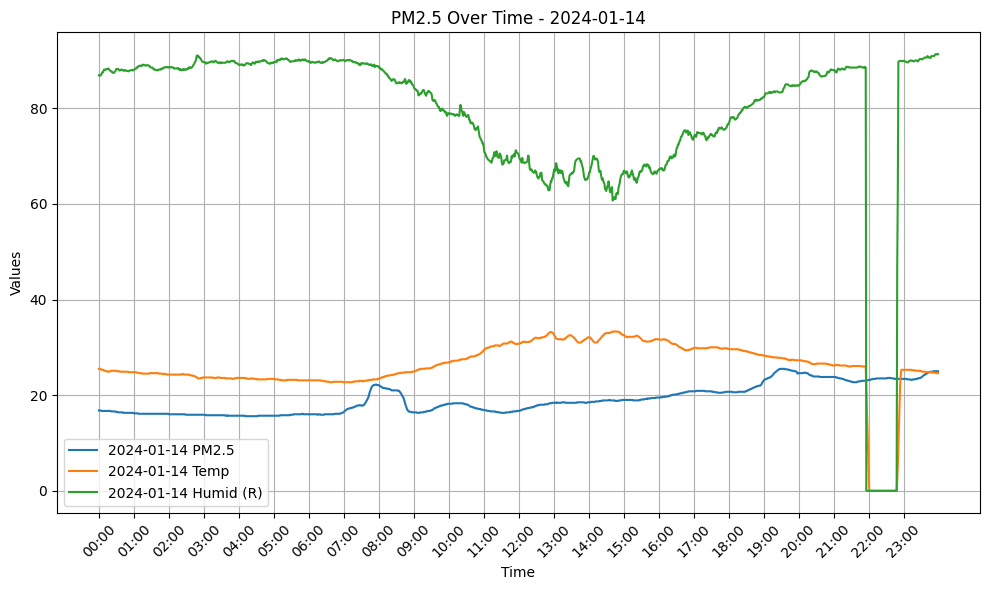

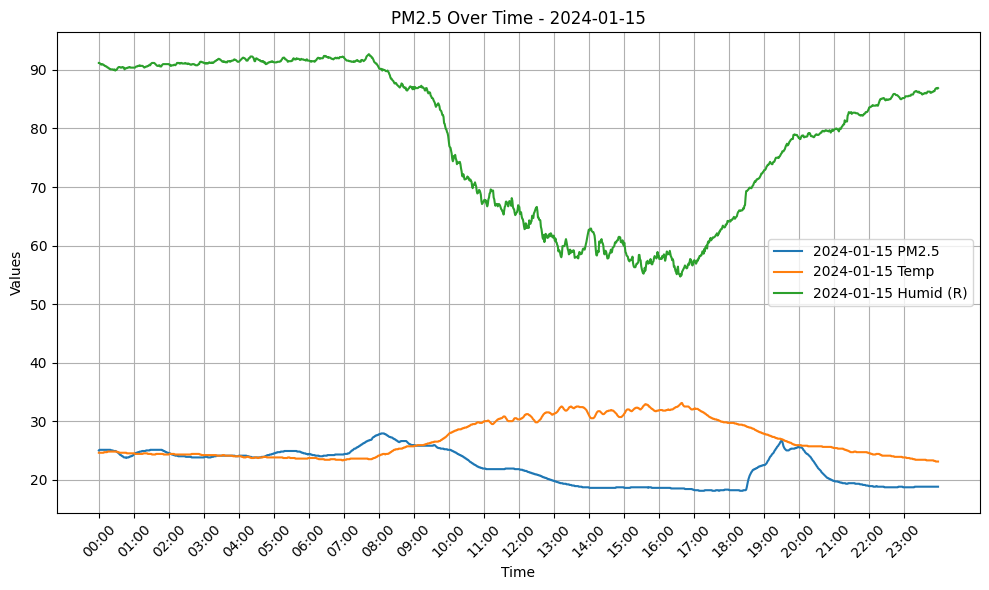

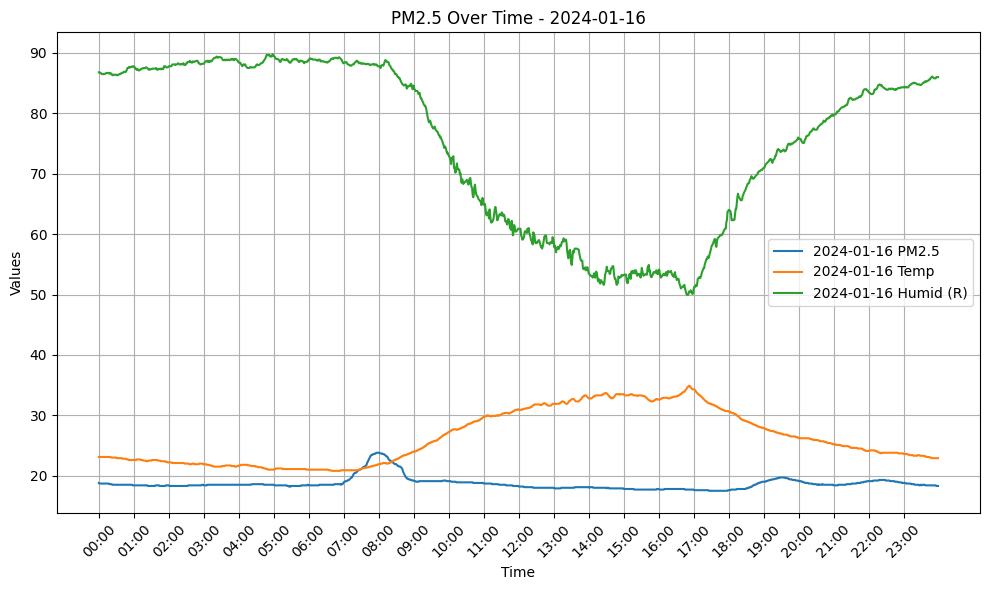

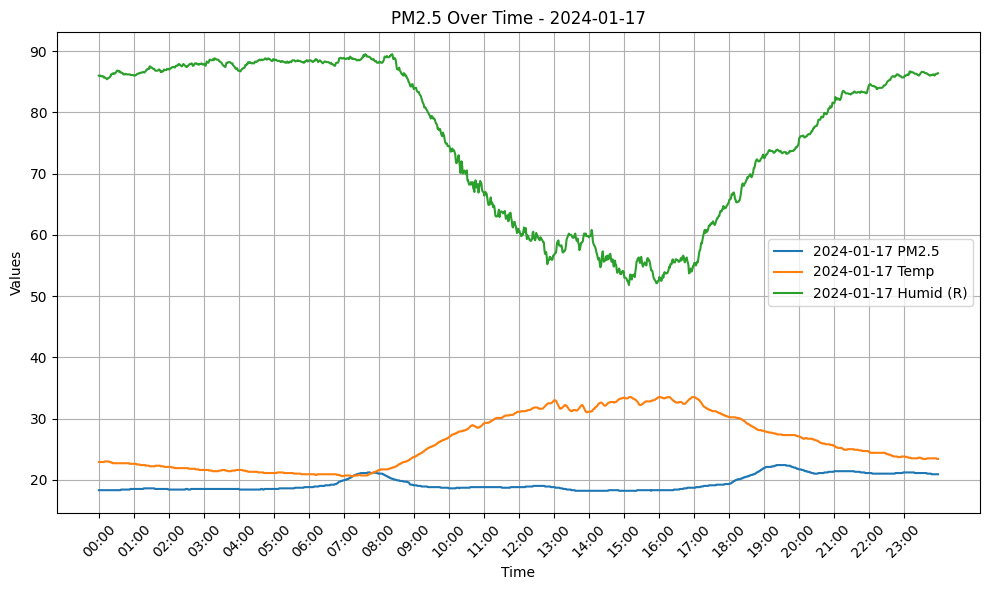

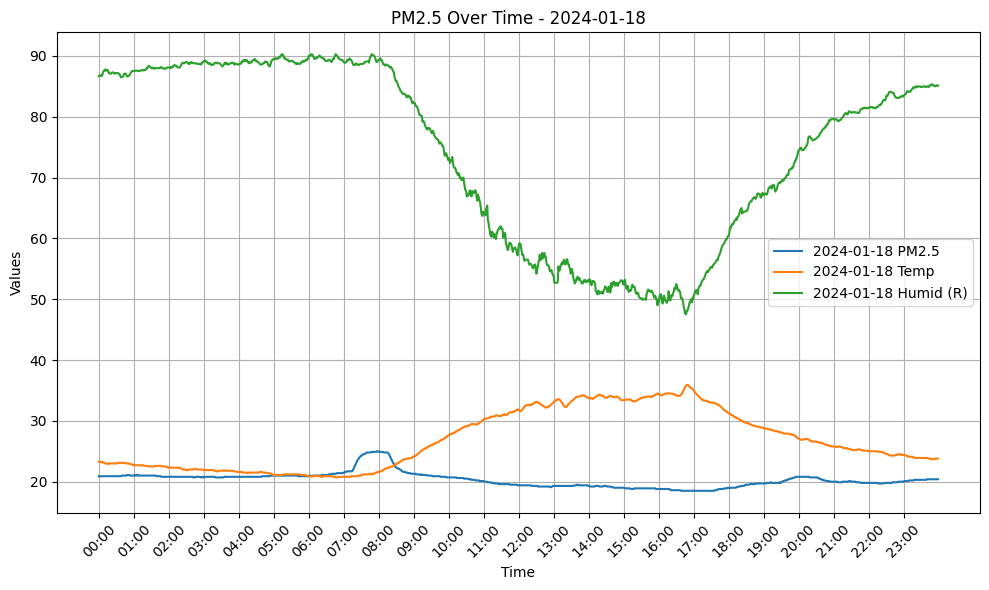

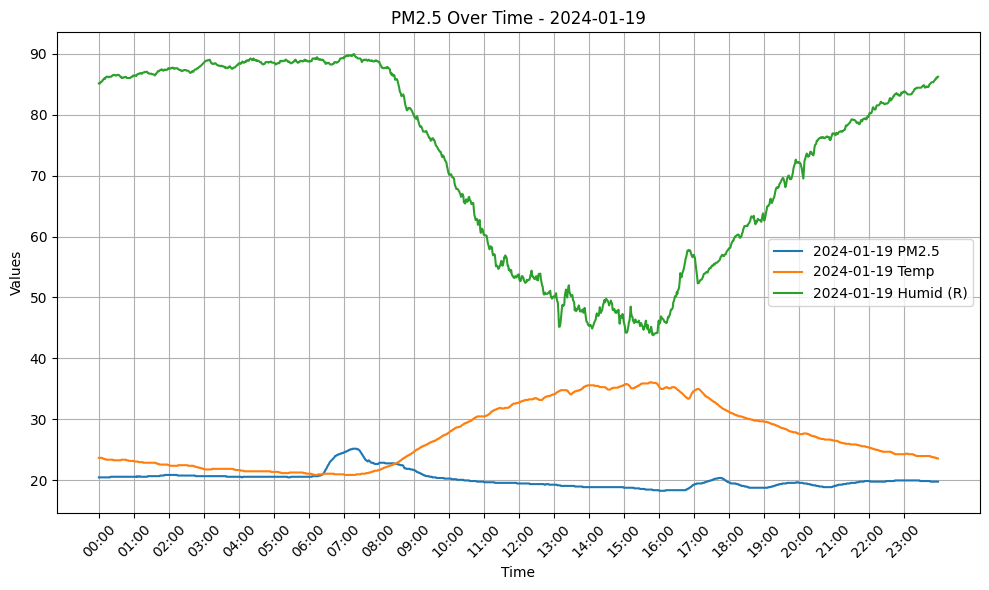

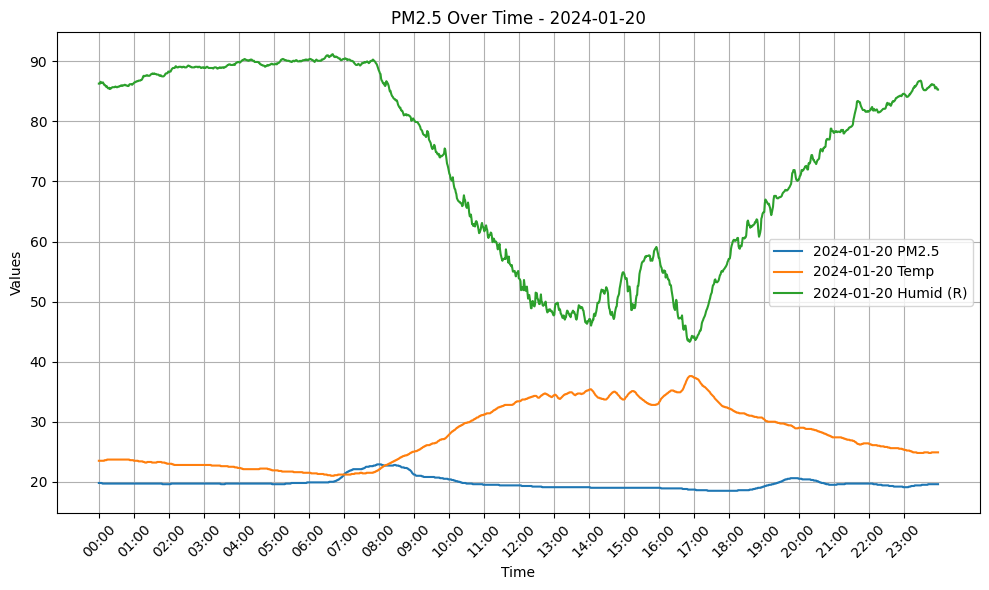

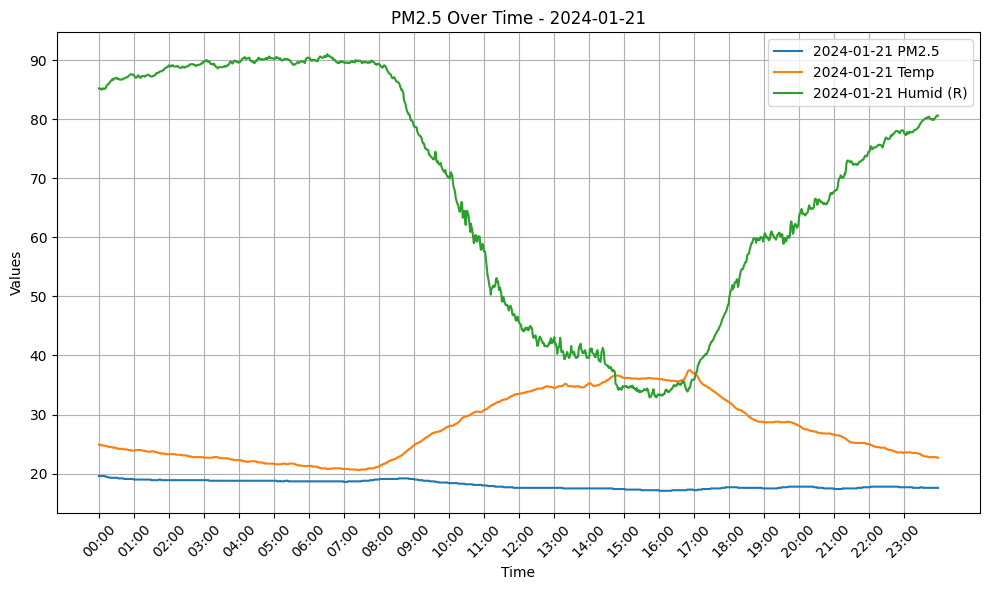

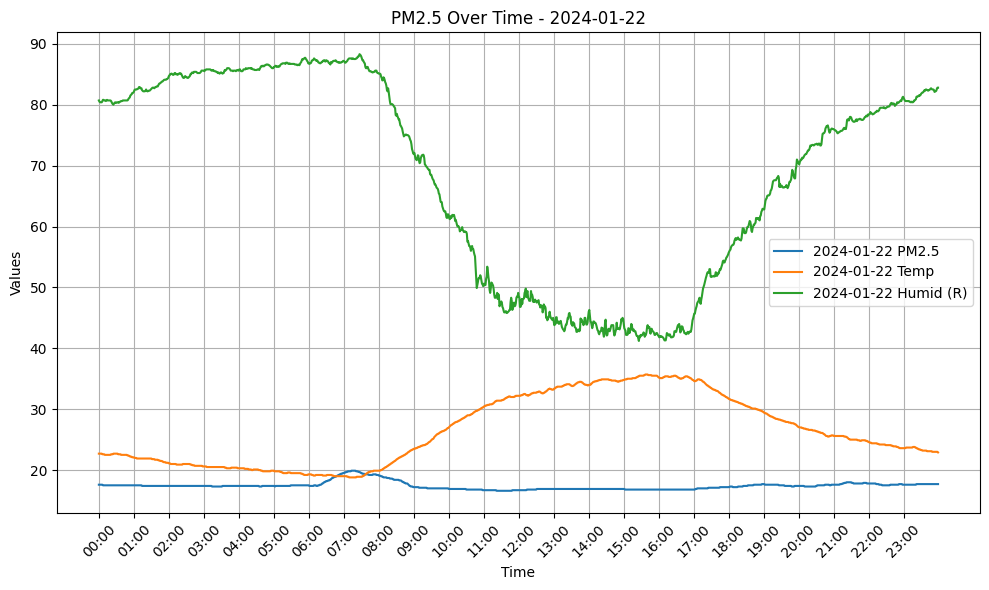

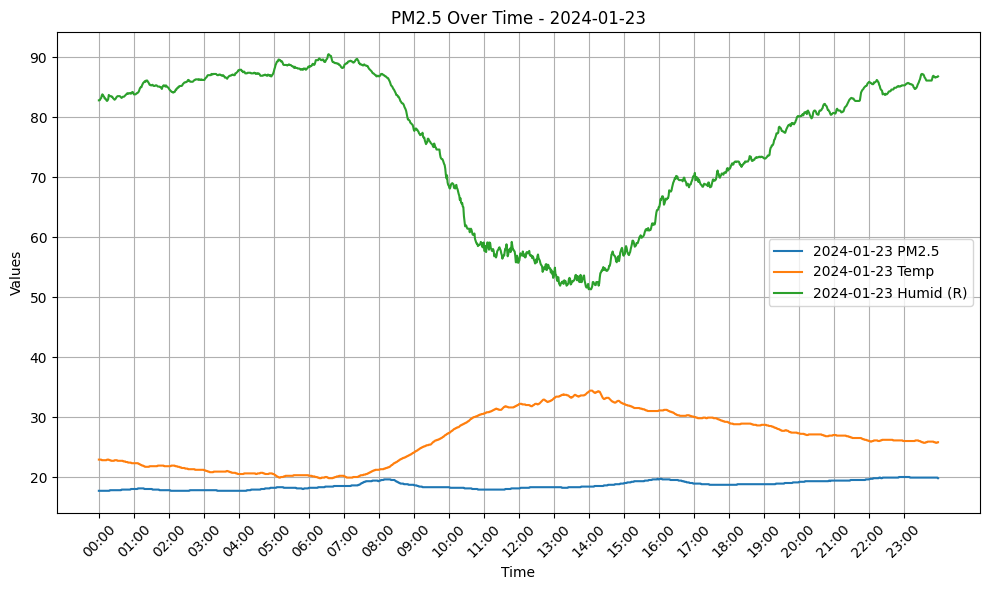

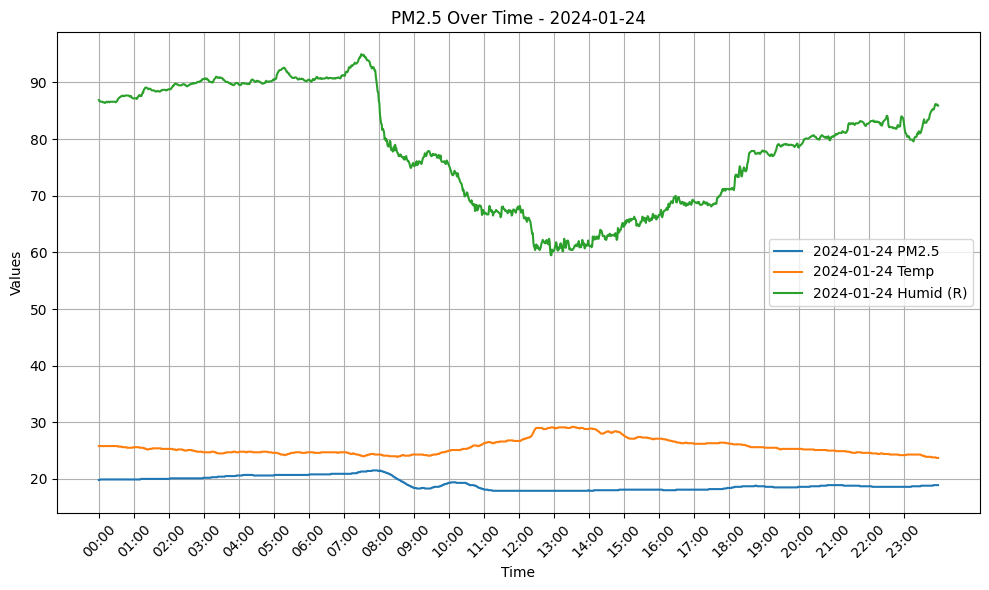

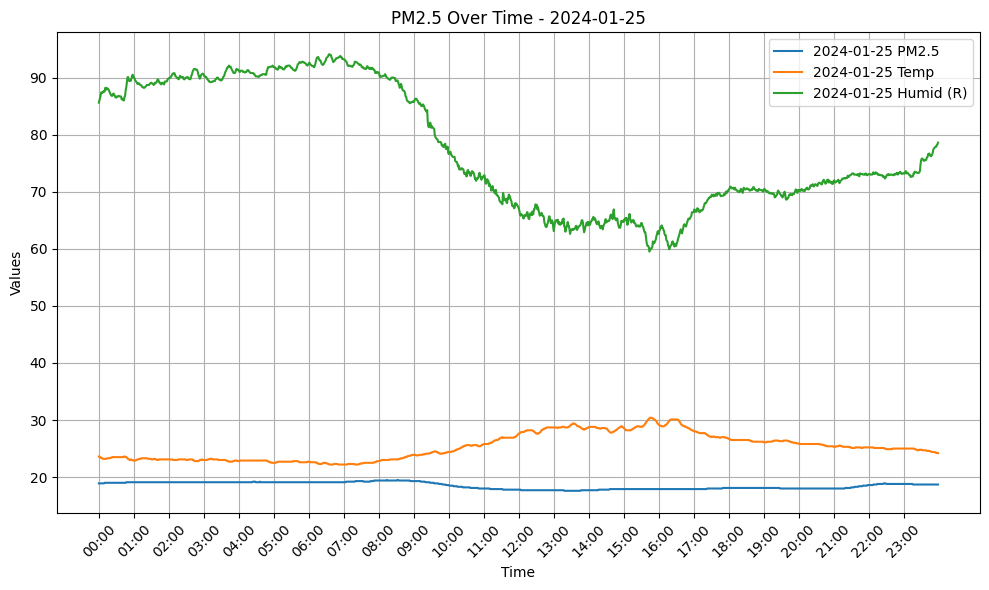

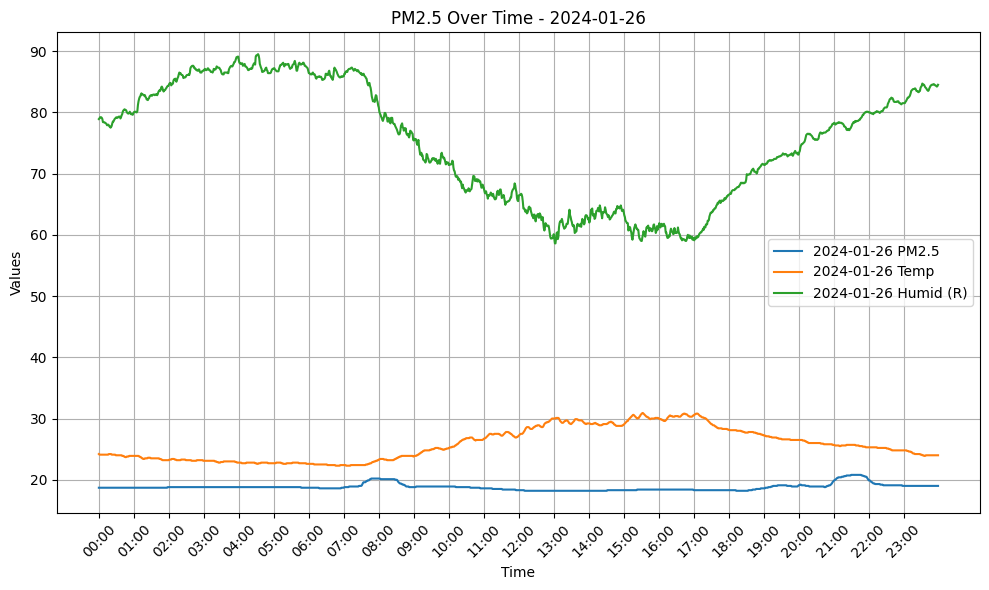

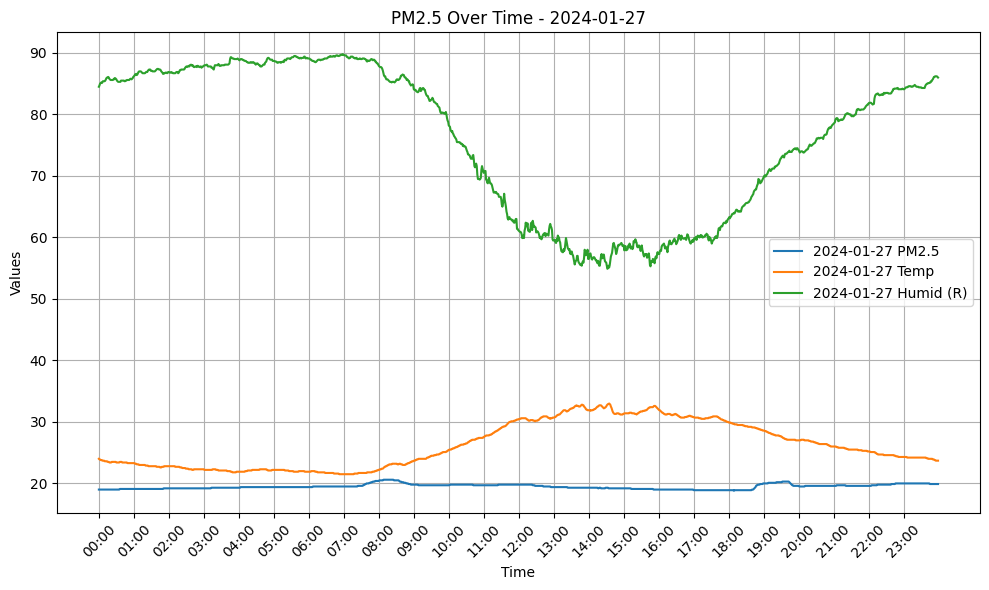

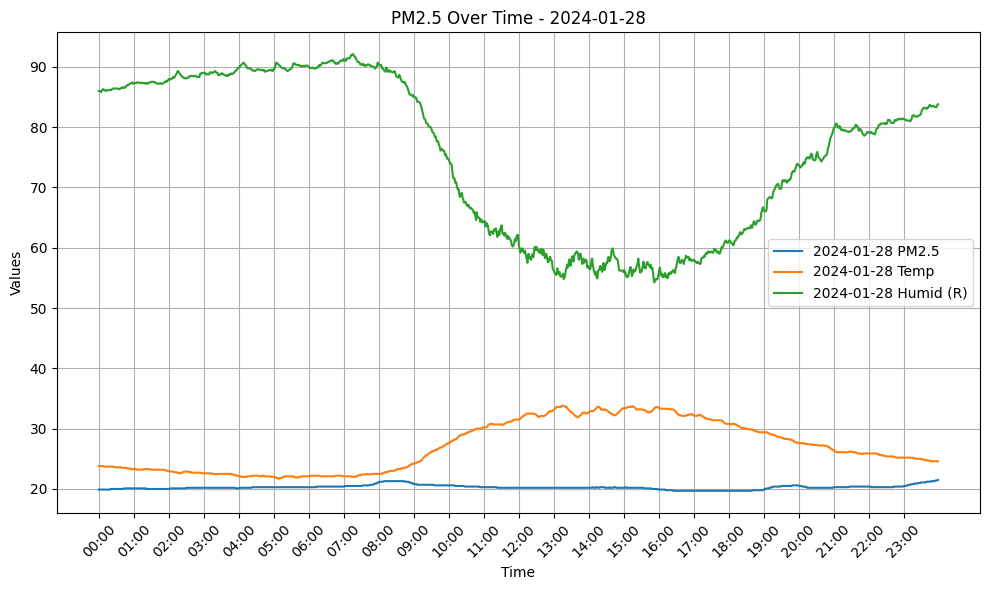

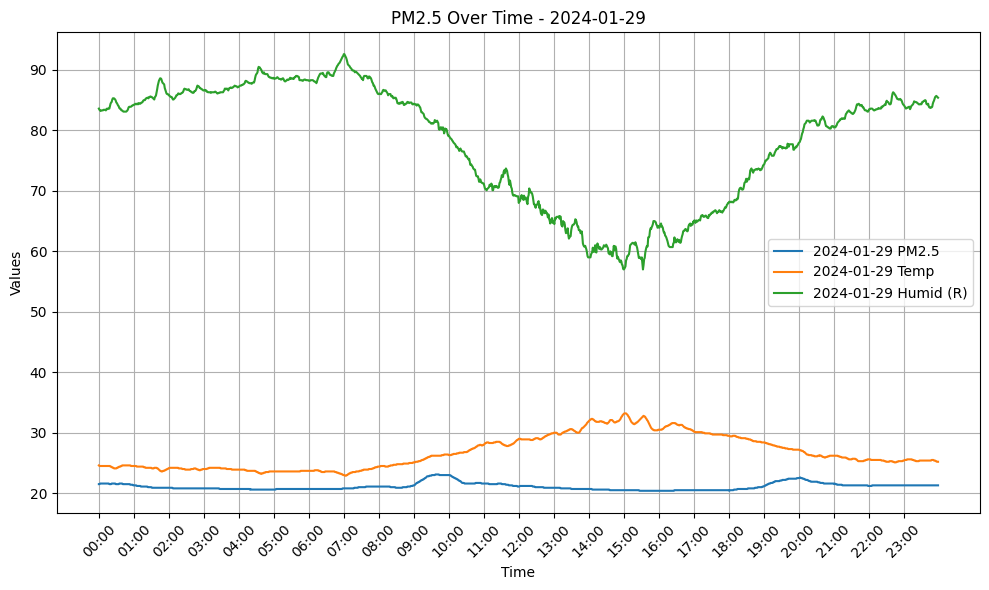

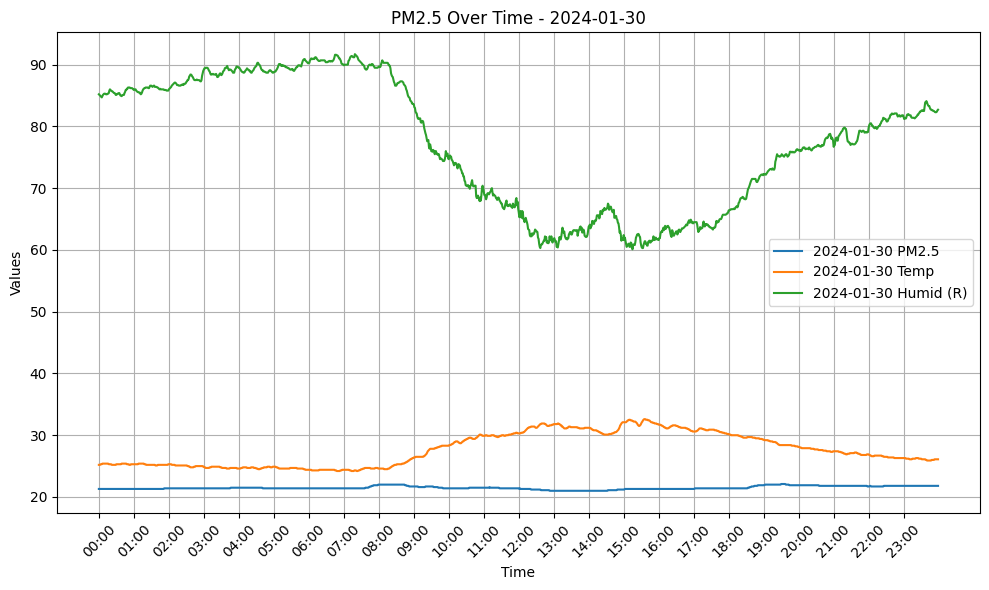

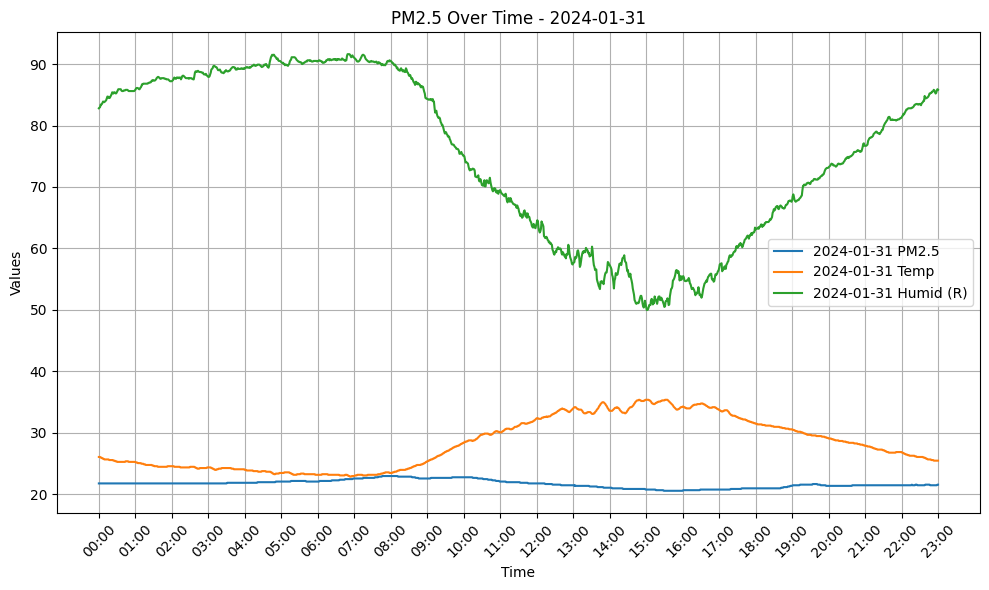

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def daily_plot(df, date):
    date_query = f'date == "{date}"'
    curr_data = df.query(date_query)

    # Drop rows with missing or invalid time values
    curr_data = curr_data.dropna(subset=['time'])

    # Change the format of HMS to HM
    curr_data['time'] = pd.to_datetime(curr_data['time'], format='%H:%M:%S', errors='coerce').dt.strftime('%H:%M')

    # Drop rows with NaT after conversion
    curr_data = curr_data.dropna(subset=['time'])

    # Sort values
    # Reverse the order based on the 'time' column
    curr_data = curr_data.sort_values(by='time', ascending=True)

    plt.figure(figsize=(10, 6))

    plt.plot(curr_data['time'], curr_data['PM2.5'], label=f'{date} PM2.5')
    plt.plot(curr_data['time'], curr_data['Temp'], label=f'{date} Temp')
    plt.plot(curr_data['time'], curr_data['Humid (R)'], label=f'{date} Humid (R)')

    plt.title(f'PM2.5 Over Time - {date}')
    plt.ylabel('Values')
    plt.xlabel('Time')
    plt.legend()
    plt.grid(True)

    # Set x-axis ticks to every hour
    hourly_ticks = pd.date_range(curr_data['time'].min(), curr_data['time'].max(), freq='H').strftime('%H:%M')
    plt.xticks(hourly_ticks, rotation=45)

    plt.tight_layout()  # Adjust layout for better appearance
    plt.show()

# Loop through days in January
for i in range(1, 32):
    curr_date = datetime(2024, 1, i).strftime('%Y-%m-%d')
    daily_plot(data, curr_date)

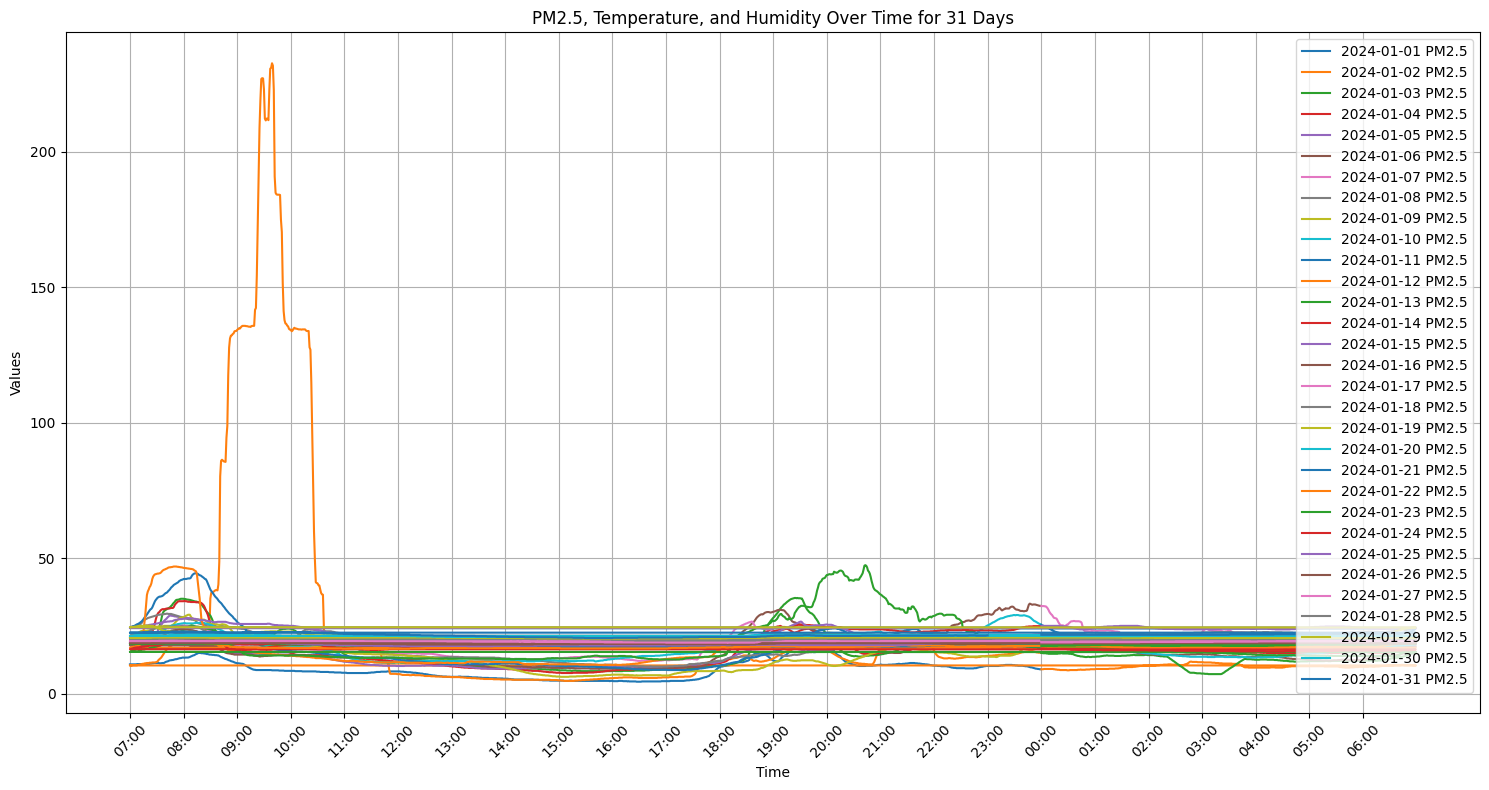

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

def daily_plot(ax, df, date):
    date_query = f'date == "{date}"'
    curr_data = df.query(date_query)

    # Drop rows with missing or invalid time values
    curr_data = curr_data.dropna(subset=['time'])

    # Change the format of HMS to HM
    curr_data['time'] = pd.to_datetime(curr_data['time'], format='%H:%M:%S', errors='coerce').dt.strftime('%H:%M')


    # Drop rows with NaT after conversion
    curr_data = curr_data.dropna(subset=['time'])

    # Sort values
    # Reverse the order based on the 'time' column
    curr_data = curr_data.sort_values(by='time', ascending=True)

    ax.plot(curr_data['time'], curr_data['PM2.5'], label=f'{date} PM2.5')
    # ax.plot(curr_data['time'], curr_data['Temp'], label=f'{date} Temp')
    # ax.plot(curr_data['time'], curr_data['Humid (R)'], label=f'{date} Humid (R)')

# Create a single figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Loop through days in January
for i in range(1, 32):
    curr_date = datetime(2024, 1, i).strftime('%Y-%m-%d')
    daily_plot(ax, data, curr_date)

ax.set_title('PM2.5, Temperature, and Humidity Over Time for 31 Days')
ax.set_ylabel('Values')
ax.set_xlabel('Time')
ax.legend()
ax.grid(True)

# Set x-axis ticks to every hour
hourly_ticks = pd.date_range(data['time'].min(), data['time'].max(), freq='H').strftime('%H:%M')
ax.set_xticks(hourly_ticks)

# Customize x-axis ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()  # Adjust layout for better appearance
plt.show()

### สิ่งที่เห็นได้จากข้อมูลที่ระบุออกมาคือ
1. เวลา 07.00 - 09.00 น. จะมีค่า PM2.5 ที่สูงอย่างเห็นได้ชัดในทุก ๆ วัน
2. เวลา 18.30 - 20.00 น. จะมีค่า PM2.5 ที่สูงขึ้นเช่นกัน
3. เวลา 12.00 - 17.00 น. จะมีค่าความร้อนที่สูงขึ้น ส่งผลต่อ PM2.5 เพียงเล็กน้อย

### สิ่งที่เปลี่ยนไป
1. วันที่ 1-13 มกราคม ช่วงเวลา 07.00 - 09.00 น. และ 18.00 - 21.00 และ 22.00 - 00.00 น. (คาดว่ามีการเผาป่าช่วงดึกเสริม)
2. ตั้งแต่วันที่ 21 มกราคม PM2.5 มีแนวโน้มลดลงจากวันที่ 1 - 20 มกรา
3. วันที่ 2 มกราคม 08.30 - 10.30 มีค่า PM2.5 ที่อันตราย คาดว่าอาจเกิดจากไฟป่ารุนแรง

### สิ่งที่แนะนำ 
1. บอกให้นักเรียนสวมใส่แมส เวลา 07.00-09.00 น. และ 18.00-21.00 น.

### ข้อมูลที่ต้องการเพิ่มเติมเพื่อสืบค้นหา Insight ของ Data อีก
1. การเดินทางของคนบริเวณใกล้โรงเรียนบ้านบ่อหวี
2. อาจมีการเผาป่า หรือปัจจัยอื่นที่ส่งผลให้ค่าสูงขึ้นในช่วงเวลา เช้าและค่ำ
3. ตำแหน่งของแหล่งไฟป่าที่เกิดขึ้น

---